Karen Gong

Partner: Harrison Robel

PHYS 434 AA Lab 7 - Event selection optimization

In [2]:
%matplotlib inline
# import library
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import statistics
import math

plt.rcParams["figure.figsize"] = (20,15)

# open the file of interest, and use pickle loading
infile = open ("qcd_100000_pt_250_500.pkl",'rb')
infile2 = open("higgs_100000_pt_250_500.pkl", 'rb')
new_dict = pickle.load(infile)
higgs = pickle.load(infile2)

# list all keys of the files
new_dict.keys()
higgs.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In this lab, we are trying to find the best selection of points to optimize signal significance. Choose low-pT (transverse momentum) samples for this lab. In each pT sample, there are dedicated training samples for event selection optimization. All studies should be carried out by normalizing Higgs and QCD samples in each pT sample to given expected yields accordingly (See Dataset descriptions).

1)Make a stacked histogram plot for the feature variable: mass

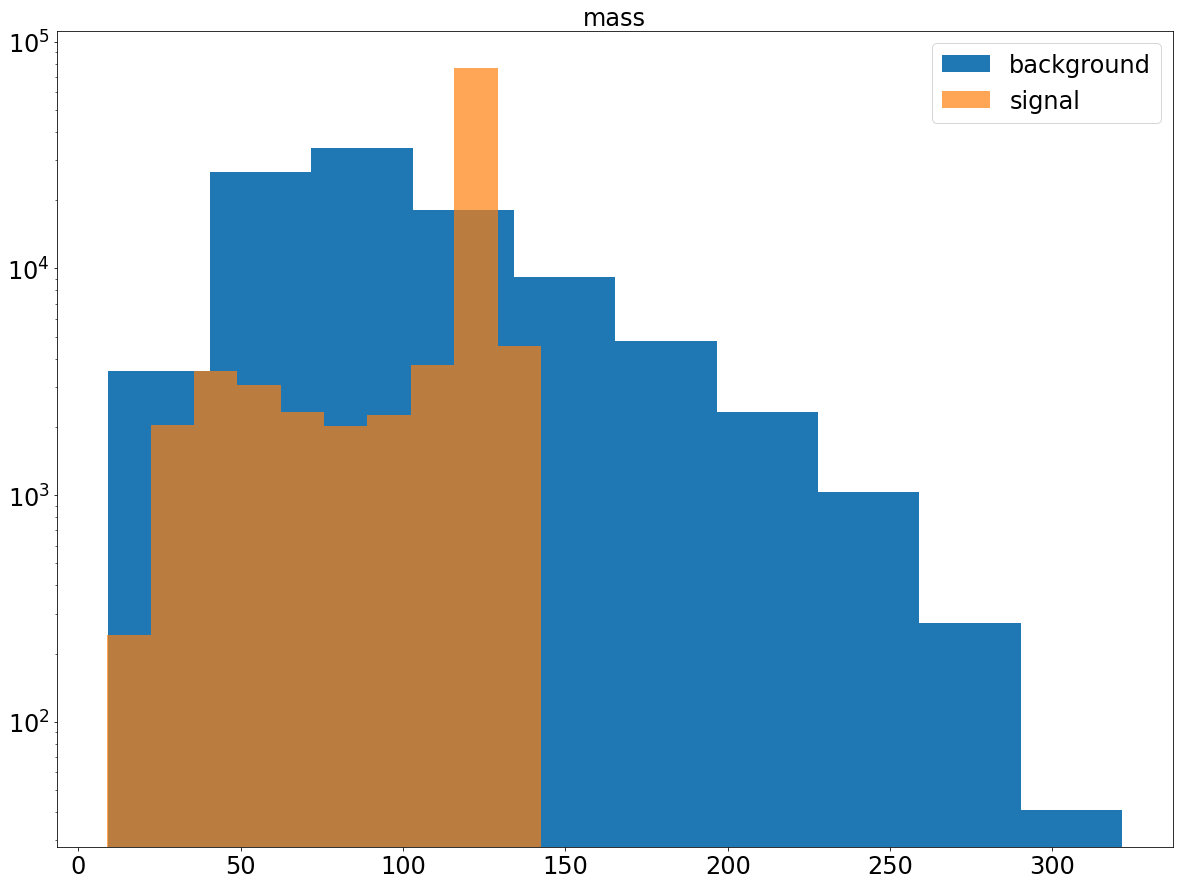

In [48]:
# background vs signal
# this function takes in background data and signal data
# and plots them on a histogram on top of each other
def bgsig(bg, sig, title):
    plt.hist(bg, label = 'background')
    plt.hist(sig, alpha = 0.7, label = 'signal')
    plt.title(title, fontsize = 24)
    plt.tick_params(labelsize = 24)
    plt.yscale('log')
    plt.legend(fontsize = 24)
    plt.show()
    
bgmass = np.array(new_dict.get('mass'))
mass = np.array(higgs.get('mass'))

bgsig(bgmass, mass, 'mass')

* Evaluate expected significance without any event selection. 
    * Use Poisson statistics for significance calculation. 
    * Compare your number of  ${N_{Higgs}/\sqrt(N_{QCD})}$ . If they are equivalent, explain your findings.

In [4]:
signal = 100
qcd = 20000

prob = stats.poisson.cdf(qcd + signal, qcd)

# my yield
sigma = stats.norm.ppf(prob)
print("My expected significance:", sigma)

# expected yield
exp_yield = signal / math.sqrt(qcd)
print("The expected yield:      ", exp_yield)

My expected significance: 0.7112259282313185
The expected yield:       0.7071067811865475


Yes, they are pretty much equivalent. This means that without any event selection (cuts to the data), the expected significance is low. 

2)Identify mass cuts to optimize the expected significance.
* Try different mass cuts systematically
* Evaluate expected significance for each set of mass cuts
* Identify the set of the mass cuts which give you the highest significance.

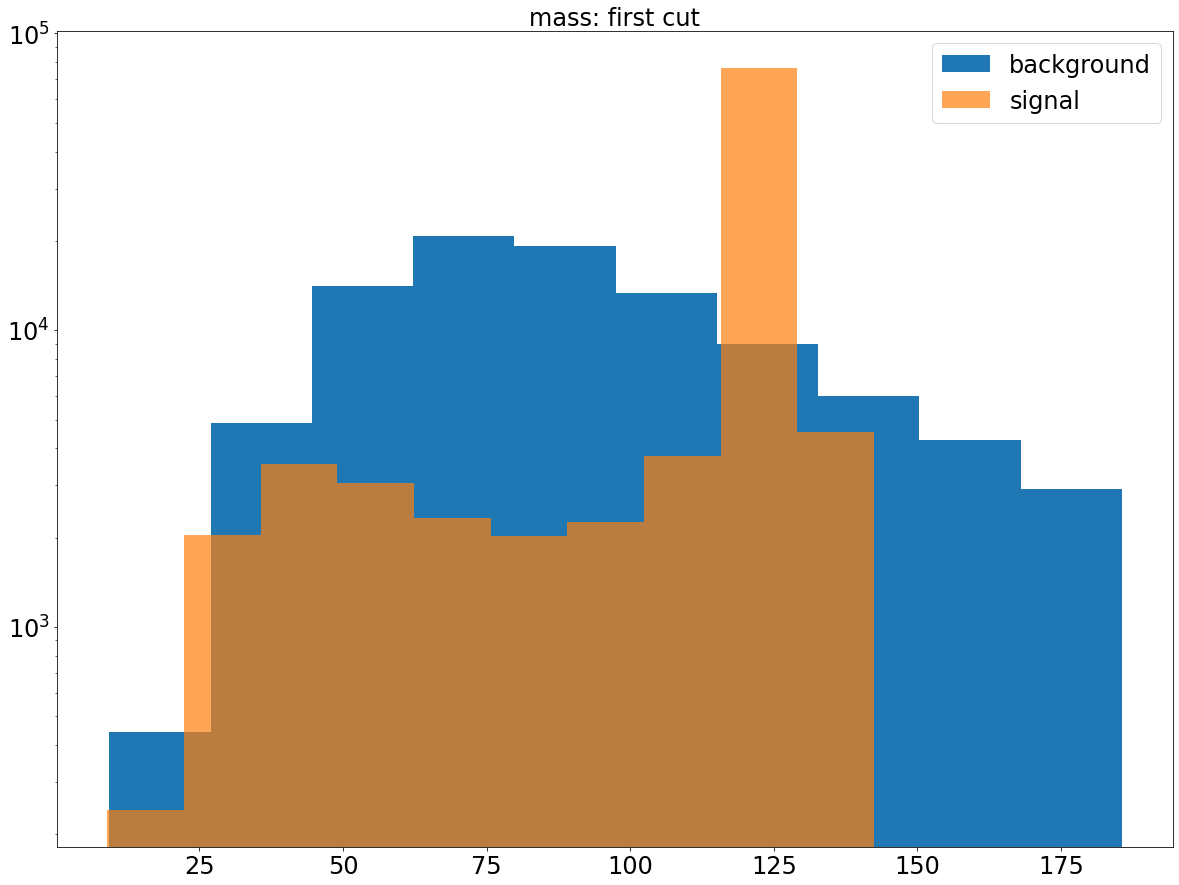

First cut expected significance: 0.7296703525329684


In [109]:
s_bgmass = sorted(np.array(new_dict.get('mass')))
s_mass = sorted(np.array(higgs.get('mass')))

bgcut = s_bgmass[0:95000]
sigcut = s_mass

bgsig(bgcut, sigcut, 'mass: first cut')

signal2 = (100 / 100000) * len(sigcut)
qcd2 = (20000 / 100000) * len(bgcut)

prob = stats.poisson.cdf(qcd2 + signal2, qcd2)

# my yield
sigma = stats.norm.ppf(prob)
print("First cut expected significance:", sigma)

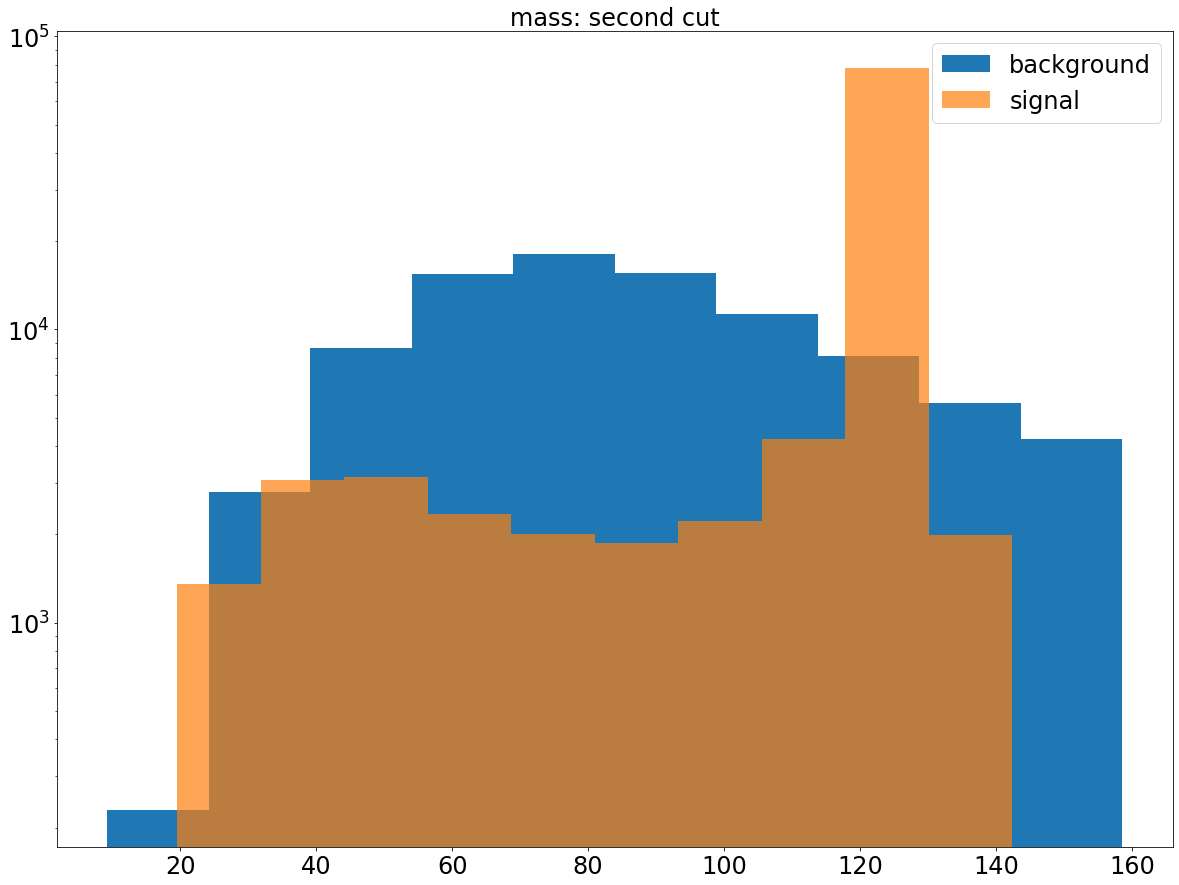

Second cut expected significance: 0.7421886475956537


In [110]:
bgcut = s_bgmass[0:90000]
sigcut = s_mass[100:]

bgsig(bgcut, sigcut, 'mass: second cut')

signal3 = (100 / 100000) * len(sigcut)
qcd3 = (20000 / 100000) * len(bgcut)

prob = stats.poisson.cdf(qcd3 + signal3, qcd3)

# my yield
sigma = stats.norm.ppf(prob)
print("Second cut expected significance:", sigma)

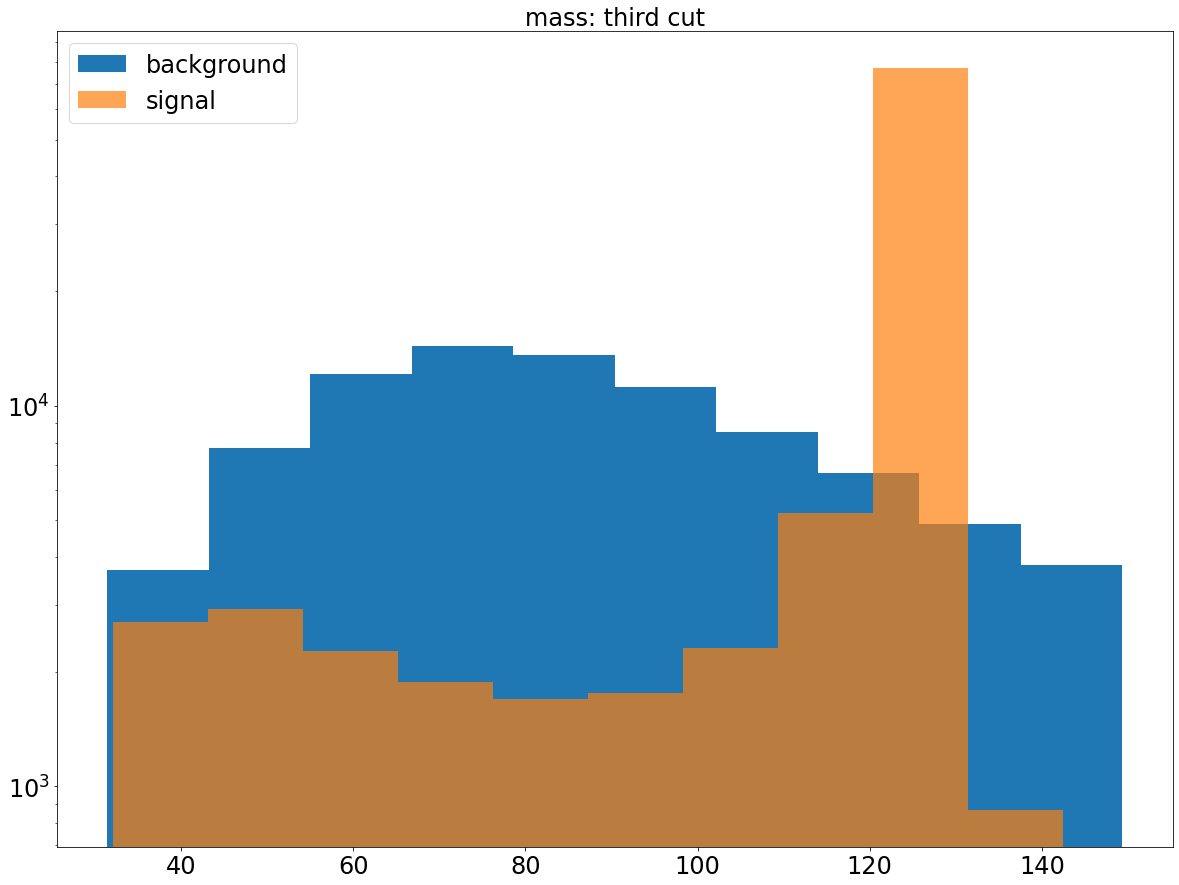

Third cut expected significance: 0.7494386214897697


In [113]:
bgcut = s_bgmass[1000:87500]
sigcut = s_mass[1500:]

bgsig(bgcut, sigcut, 'mass: third cut')

signal4 = (100 / 100000) * len(sigcut)
qcd4 = (20000 / 100000) * len(bgcut)

prob = stats.poisson.cdf(qcd4 + signal4, qcd4)

# my yield
sigma = stats.norm.ppf(prob)
print("Third cut expected significance:", sigma)

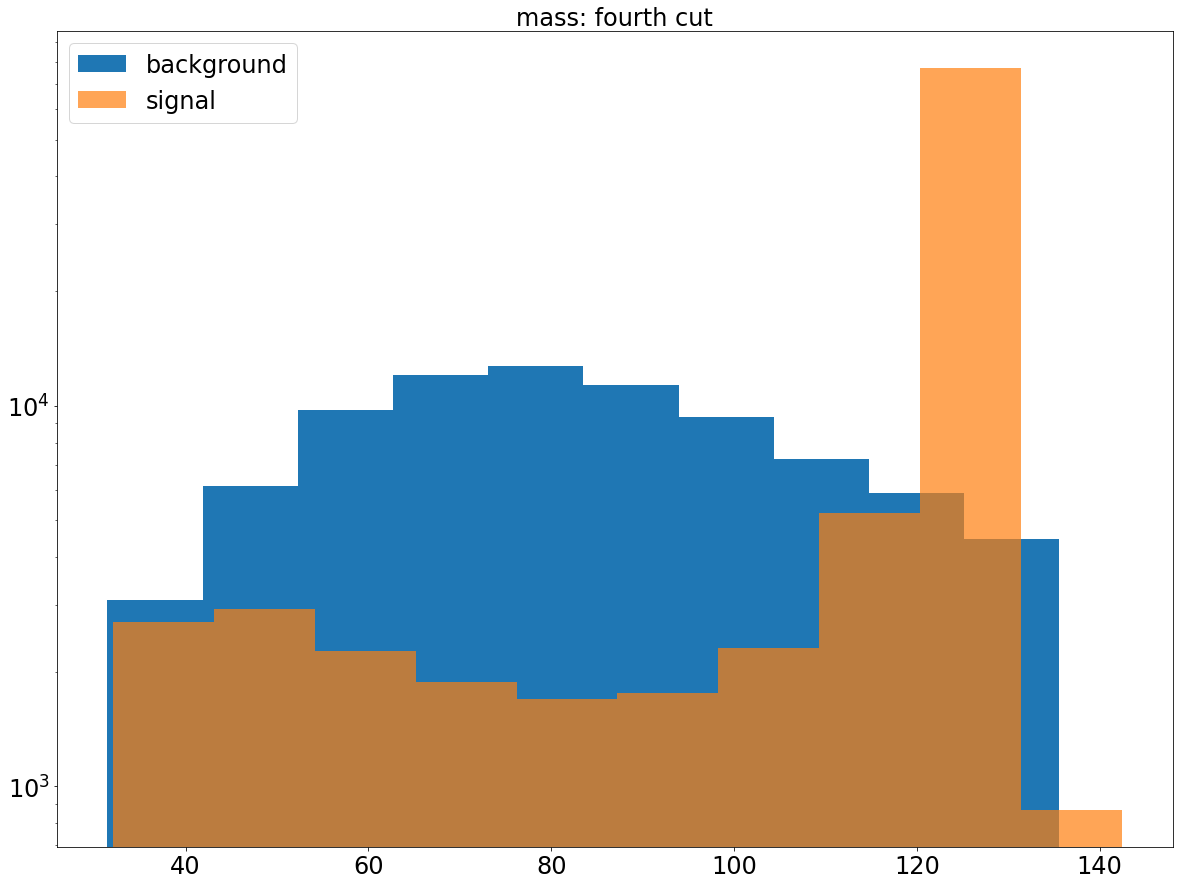

Fourth cut expected significance: 0.769687918284413

The fourth set of cuts gives the highest significance value of 0.769687918284413


In [116]:
bgcut = s_bgmass[1000:83000]
sigcut = s_mass[1500:]

bgsig(bgcut, sigcut, 'mass: fourth cut')

signal5 = (100 / 100000) * len(sigcut)
qcd5 = (20000 / 100000) * len(bgcut)

prob = stats.poisson.cdf(qcd5 + signal5, qcd5)

# my yield
sigma = stats.norm.ppf(prob)
print("Fourth cut expected significance:", sigma)

print("\nThe fourth set of cuts gives the highest significance value of", sigma)

3)Make stacked histogram plots for the rest of features

In [118]:
# background data
bgpt = np.array(new_dict.get('pt'))
bgeta = np.array(new_dict.get('eta'))
bgphi = np.array(new_dict.get('phi'))
bgmass = np.array(new_dict.get('mass'))
bgee2 = np.array(new_dict.get('ee2'))
bgee3 = np.array(new_dict.get('ee3'))
bgd2 = np.array(new_dict.get('d2'))
bgangularity = np.array(new_dict.get('angularity'))
bgt1 = np.array(new_dict.get('t1'))
bgt2 = np.array(new_dict.get('t2'))
bgt3 = np.array(new_dict.get('t3'))
bgt21 = np.array(new_dict.get('t21'))
bgt32 = np.array(new_dict.get('t32'))
bgKtDeltaR = np.array(new_dict.get('KtDeltaR'))

# signal data
pt = np.array(higgs.get('pt'))
eta = np.array(higgs.get('eta'))
phi = np.array(higgs.get('phi'))
mass = np.array(higgs.get('mass'))
ee2 = np.array(higgs.get('ee2'))
ee3 = np.array(higgs.get('ee3'))
d2 = np.array(higgs.get('d2'))
angularity = np.array(higgs.get('angularity'))
t1 = np.array(higgs.get('t1'))
t2 = np.array(higgs.get('t2'))
t3 = np.array(higgs.get('t3'))
t21 = np.array(higgs.get('t21'))
t32 = np.array(higgs.get('t32'))
KtDeltaR = np.array(higgs.get('KtDeltaR'))

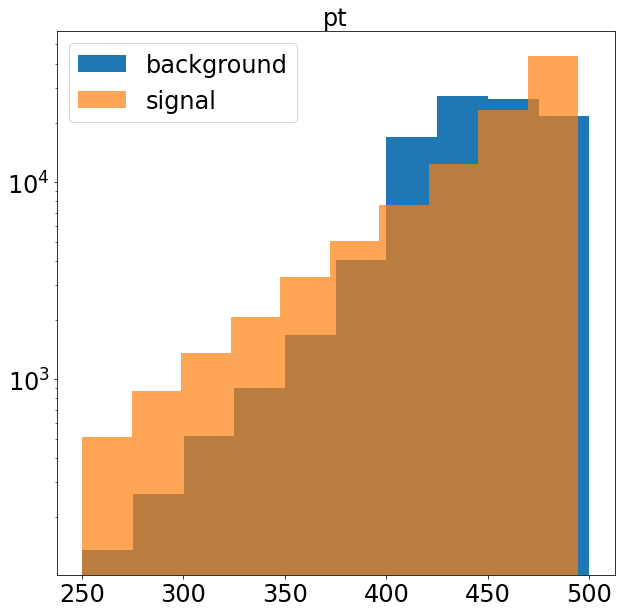

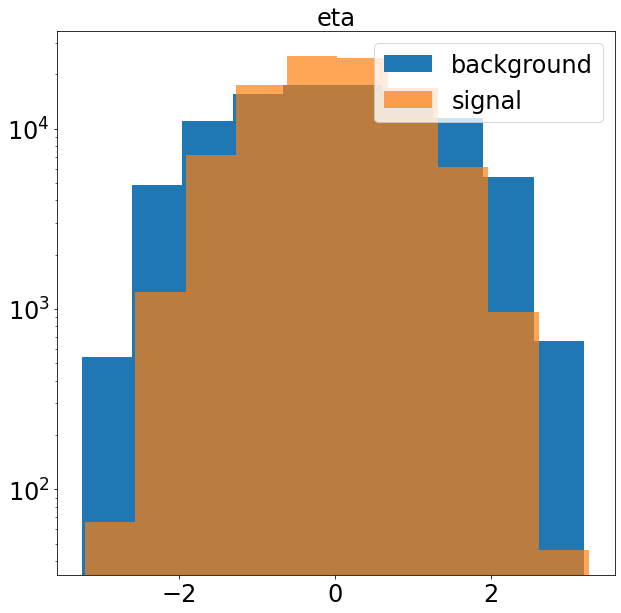

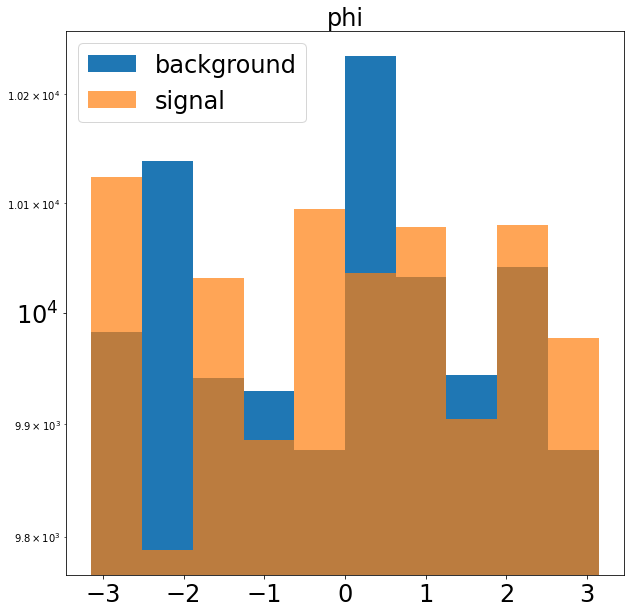

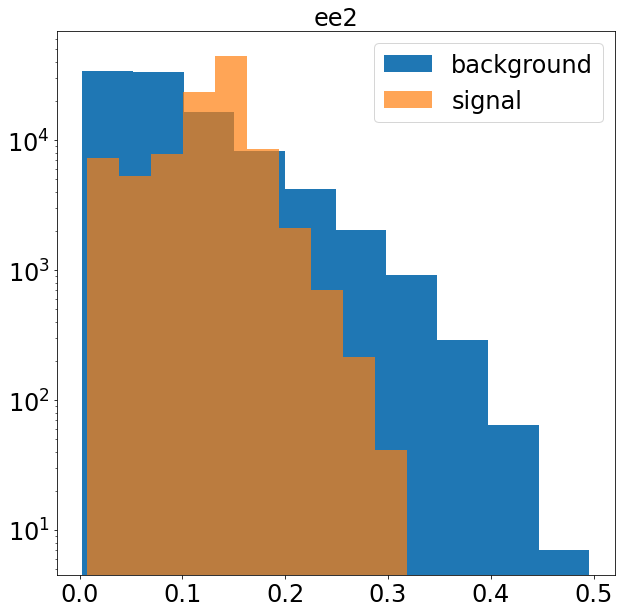

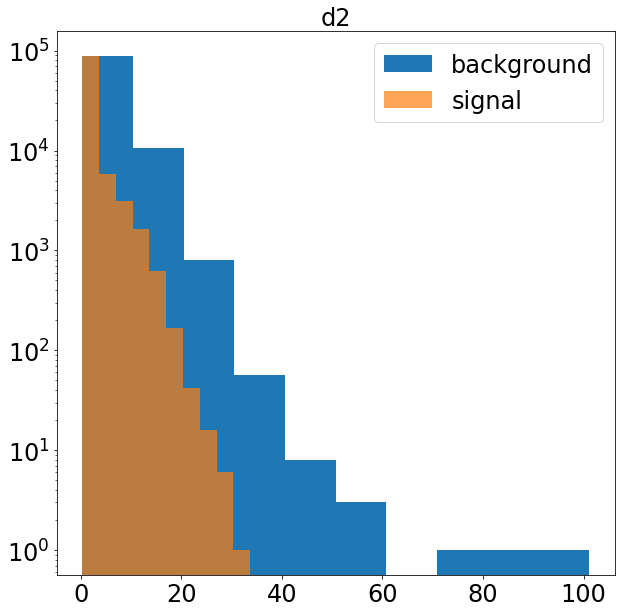

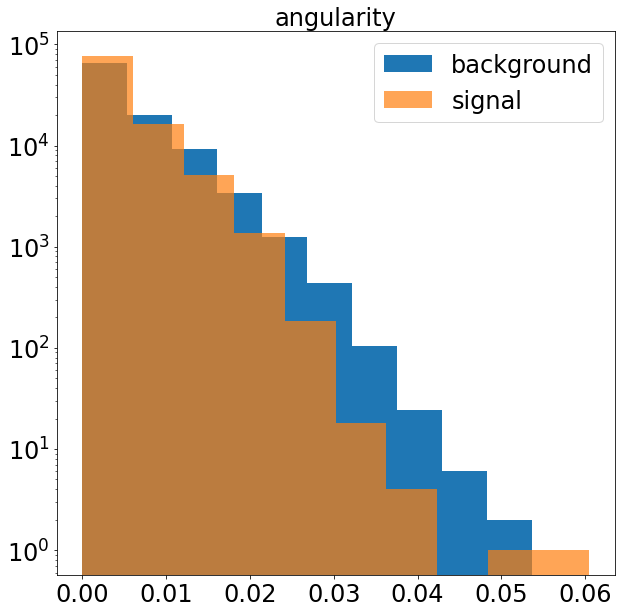

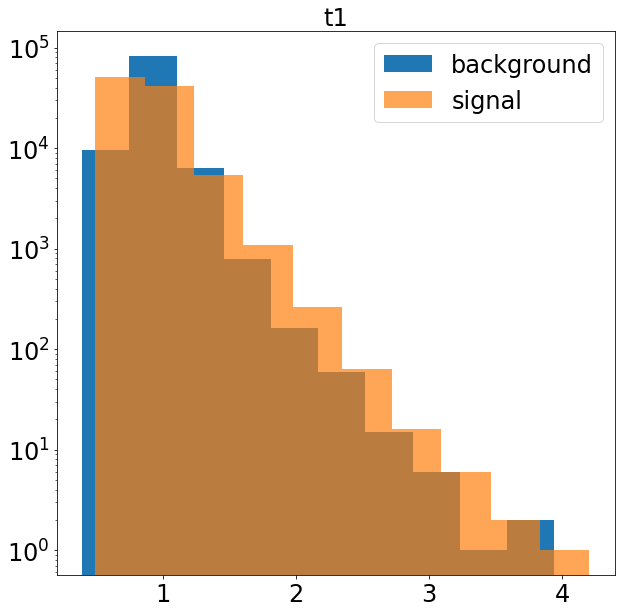

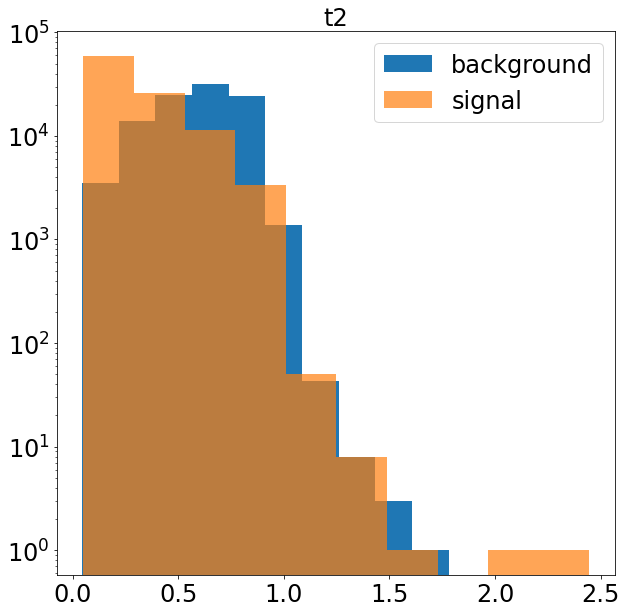

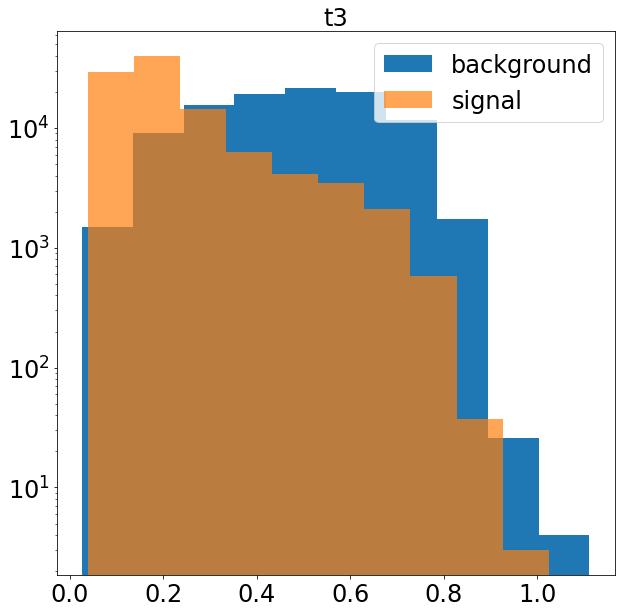

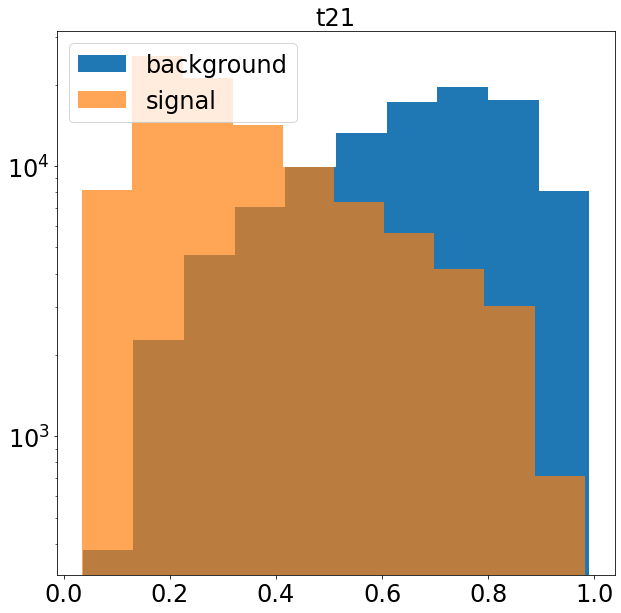

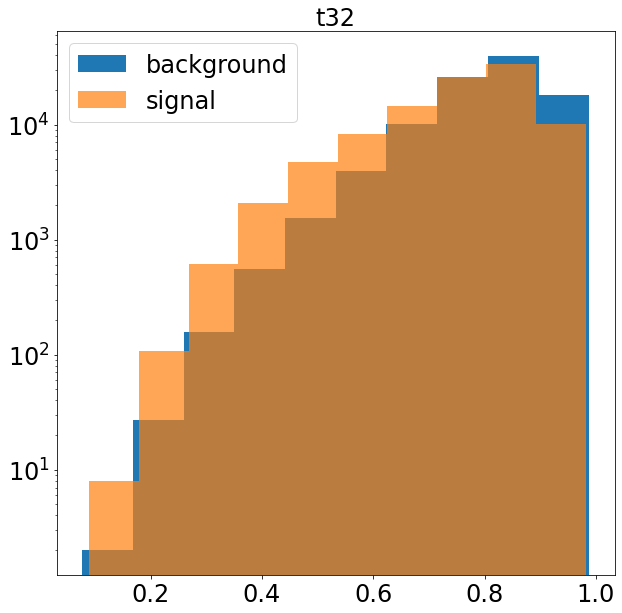

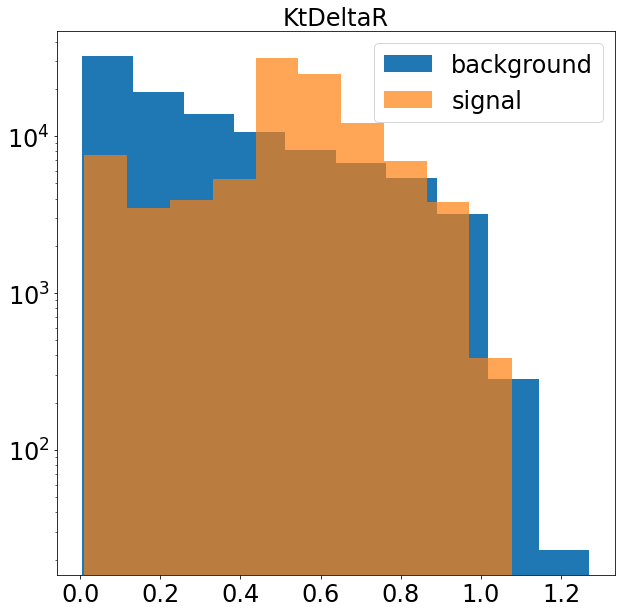

In [122]:
#Set A of plots with no selections
plt.rcParams["figure.figsize"] = (10,10)

bgsig(bgpt, pt, "pt")
bgsig(bgeta, eta, "eta")
bgsig(bgphi, phi, "phi")
bgsig(bgee2, ee2, "ee2")
bgsig(bgd2, d2, "d2")
bgsig(bgangularity, angularity, "angularity")
bgsig(bgt1, t1, "t1")
bgsig(bgt2, t2, "t2")
bgsig(bgt3, t3, "t3")
bgsig(bgt21, t21, "t21")
bgsig(bgt32, t32, "t32")
bgsig(bgKtDeltaR, KtDeltaR, "KtDeltaR")

* Set A of plots without any event selection
    * Can you identify another feature as discriminative as mass feature (i.e. equal or better significance after feature cut)
* Set B of plots with your optimal mass cuts
    * Can you identify additional feature to further improve expected significance?

The feature 'd2' is as disciminative as the mass feature, because there is a large chunk of the background that is not overlapped by the signal. 

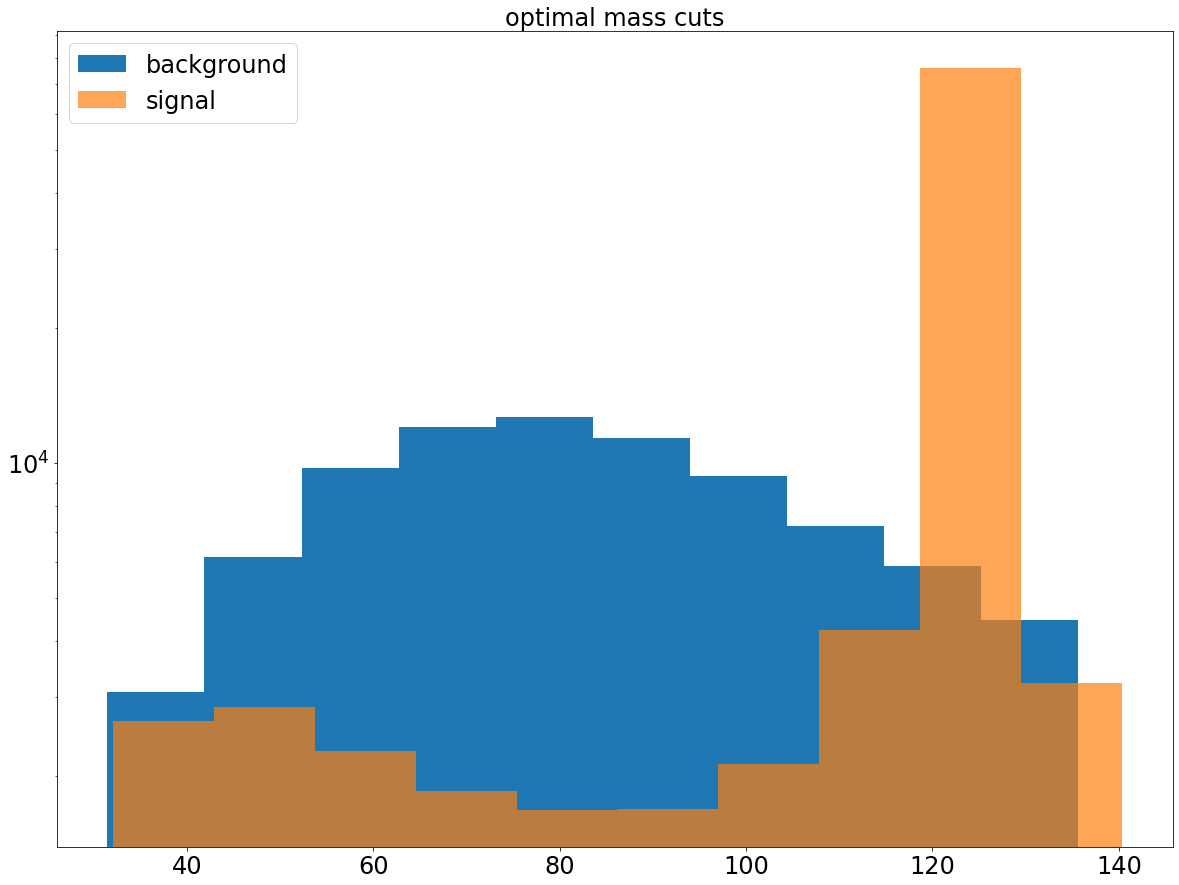

In [125]:
# Set B optimal mass cuts
plt.rcParams["figure.figsize"] = (20,15)
bgcut = s_bgmass[1000:83000]
sigcut = s_mass[1500:]

bgsig(bgcut, sigcut, 'optimal mass cuts')

There is not much more to improve for mass cuts, unless we cut off part of the signal; however, when that happens, the significance of the signal goes down.

4)Optimize event selections using multiple features (if necessary)
* Find a set of feature cuts which can help you to achieve the best significance.
* Compare significance (before/after event selection) derived in your pT samples to your lab partner. Describe your findings.

A set of feature cuts that can help achieve the best significance is removing the lower and upper parts of the background, where the signal does not overlap with the background, as well as any other places where the signal does not overlap the background.